# Setup

Binned maps help: https://stackoverflow.com/questions/40465026/groupby-bins-on-two-variables

In [1]:
# import your standard packages
%run pkgs.py

# import your local functions
sys.path.insert(1, '../')
from local_functions import *

# make sure the figures plot inline rather than at the end
%matplotlib inline

Default libraries loaded.


# Get Data


In [2]:
# WOA
ds_WOD = xr.open_dataset('../data/wod_processed.nc')
ds_WOD

ds_WOD["time"] = ds_WOD.time.dt.floor("D")
ds_WOD

<xarray.Dataset>
Dimensions:                      (coastal_loc: 341437, coastal_pos: 139423, lonmin,lonmax,latmin,latmax: 4, pres: 57, time: 341437)
Coordinates:
  * time                         (time) datetime64[ns] 1770-01-01 ... 2020-05-31
  * pres                         (pres) int64 0 5 10 15 ... 1350 1400 1450 1500
  * coastal_loc                  (coastal_loc) int64 0 1 2 ... 341435 341436
  * coastal_pos                  (coastal_pos) int64 0 1 2 ... 139421 139422
  * lonmin,lonmax,latmin,latmax  (lonmin,lonmax,latmin,latmax) int64 0 1 2 3
Data variables:
    temp                         (time, pres) float64 ...
    sal                          (time, pres) float64 ...
    doxy                         (time, pres) float64 ...
    nitrate                      (time, pres) float64 ...
    phosphate                    (time, pres) float64 ...
    lat                          (time) float32 ...
    lon                          (time) float32 ...
    cast_id                      (ti

In [15]:
binwidth = 1
bounds = [35,120,-20,30]

# TCD/OCD Binned
temp_binned_ave_WOD,temp_bincounts_WOD,latbins,lonbins = latlonbin(ds_WOD.temp_50_200,ds_WOD.lat,ds_WOD.lon,bounds,binwidth)
doxy_binned_ave_WOD,doxy_bincounts_WOD,_,_ = latlonbin(ds_WOD.doxy_50_200,ds_WOD.lat,ds_WOD.lon,bounds,binwidth)


/projects/GEOCLIM/LRGROUP/jennap/Modulation_of_Coastal_Hypoxia_by_the_IOD/code/local_functions.py:537: RuntimeWarning: Mean of empty slice
  invar_binned_ave[i[0],j[0]] = np.nanmean(group.invar)
/projects/GEOCLIM/LRGROUP/jennap/Modulation_of_Coastal_Hypoxia_by_the_IOD/code/local_functions.py:537: RuntimeWarning: Mean of empty slice
  invar_binned_ave[i[0],j[0]] = np.nanmean(group.invar)


# Temperature

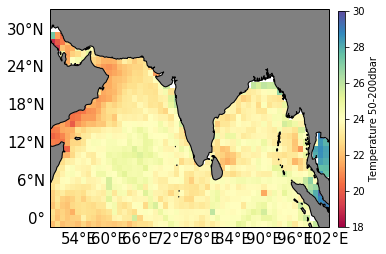

In [21]:
# Plotting

xx,yy = np.meshgrid(lonbins,latbins)
xx = xx.flatten()
yy = yy.flatten()

# limits
cmin = 18
cmax = 30
s = 20
cmap = plt.cm.Spectral # plt.cm.PuOr

fig, ax = plt.subplots(nrows = 1, ncols = 1,figsize=(5,4),subplot_kw={'projection': ccrs.PlateCarree()})

p = ax.scatter(xx,yy,c = temp_binned_ave_WOD.flatten(),marker='s',
                      cmap=cmap,vmin=cmin,vmax=cmax,transform=ccrs.PlateCarree())
add_land(ax)
# axes[0].set_title('Binned Temperature 50-200dbar')

cbar_ax = fig.add_axes([0.925, 0.125, 0.02, 0.75])
cbar = fig.colorbar(p,cax=cbar_ax, pad=0.04)
cbar.set_label('Temperature 50-200dbar')

# Oxygen

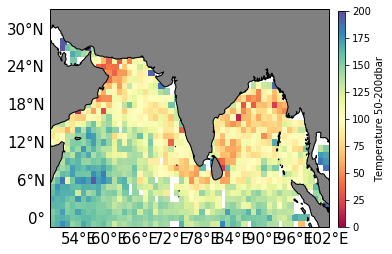

In [18]:
# Plotting

xx,yy = np.meshgrid(lonbins,latbins)
xx = xx.flatten()
yy = yy.flatten()

# limits
cmin = 0
cmax = 200
s = 20
cmap = plt.cm.Spectral # plt.cm.PuOr

fig, ax = plt.subplots(nrows = 1, ncols = 1,figsize=(5,4),subplot_kw={'projection': ccrs.PlateCarree()})

p = ax.scatter(xx,yy,c = doxy_binned_ave_WOD.flatten(),marker='s',
                      cmap=cmap,vmin=cmin,vmax=cmax,transform=ccrs.PlateCarree())
add_land(ax)
# axes[0].set_title('Binned Temperature 50-200dbar')

cbar_ax = fig.add_axes([0.925, 0.125, 0.02, 0.75])
cbar = fig.colorbar(p,cax=cbar_ax, pad=0.04)
cbar.set_label('Temperature 50-200dbar')